@Author: Bhupinder Singh

@Date: 23-02-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 24-02-2023

@Title: CNN model for binary class classification

In [51]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,Input
from keras.models import Model

Data Augmentation

In [52]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

Reading the Dataset

In [53]:
# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
# Creating training set
train_ds = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Creating the Test set
validation_ds = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Creation Of cnn model

In [56]:

 
# Build the model using the functional API
# input layer
i = Input(shape=(200,200,3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(1, activation='sigmoid')(x)
 
model = Model(i, x)
 


In [58]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_22 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 batch_normalization_17 (Bat  (None, 200, 200, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 200, 200, 32)      9248      
                                                                 
 batch_normalization_18 (Bat  (None, 200, 200, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 100, 100, 32)     0     

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
history = model.fit(train_ds,epochs=13,validation_data=validation_ds)

Epoch 1/13
250/250 [==============================] - 976s 4s/step - loss: 3.1315 - accuracy: 0.5994 - val_loss: 1.2190 - val_accuracy: 0.5010
Epoch 2/13
250/250 [==============================] - 872s 3s/step - loss: 0.5975 - accuracy: 0.6776 - val_loss: 0.7785 - val_accuracy: 0.6370
Epoch 3/13
250/250 [==============================] - 848s 3s/step - loss: 0.5471 - accuracy: 0.7199 - val_loss: 0.5621 - val_accuracy: 0.7280
Epoch 4/13
250/250 [==============================] - 847s 3s/step - loss: 0.5170 - accuracy: 0.7423 - val_loss: 0.7659 - val_accuracy: 0.6380
Epoch 5/13
250/250 [==============================] - 850s 3s/step - loss: 0.4992 - accuracy: 0.7628 - val_loss: 0.5842 - val_accuracy: 0.7300
Epoch 6/13
250/250 [==============================] - 839s 3s/step - loss: 0.4761 - accuracy: 0.7740 - val_loss: 1.9240 - val_accuracy: 0.5805
Epoch 7/13
250/250 [==============================] - 845s 3s/step - loss: 0.4805 - accuracy: 0.7763 - val_loss: 0.4988 - val_accuracy: 0.7690

### Training and validation accuracy curve

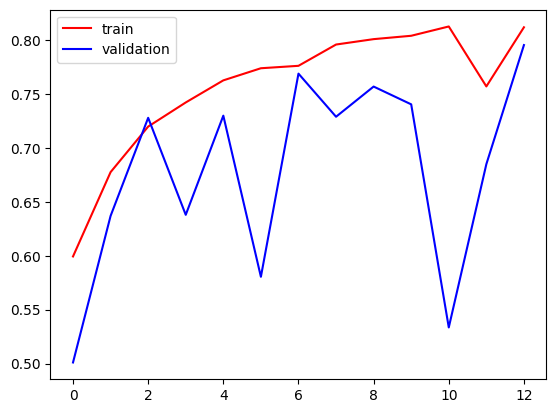

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()